In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file {name}'.format(name=fn))

!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file kaggle.json


In [3]:
!kaggle --version

Kaggle API 1.5.12


In [4]:
!ls /root/.kaggle

kaggle.json


In [5]:
!kaggle datasets download -d anefiamutiaraatha/dataset-tanaman-herbal

100% 3.35G/3.35G [00:38<00:00, 180MB/s]
100% 3.35G/3.35G [00:38<00:00, 93.1MB/s]


In [6]:
!unzip dataset-tanaman-herbal.zip

Archive:  dataset-tanaman-herbal.zip
  inflating: DATASET TANAMAN HERBAL/Data Testing/Daun Jambu Biji/jambu biji (100).JPG  
  inflating: DATASET TANAMAN HERBAL/Data Testing/Daun Jambu Biji/jambu biji (81).JPG  
  inflating: DATASET TANAMAN HERBAL/Data Testing/Daun Jambu Biji/jambu biji (82).JPG  
  inflating: DATASET TANAMAN HERBAL/Data Testing/Daun Jambu Biji/jambu biji (83).JPG  
  inflating: DATASET TANAMAN HERBAL/Data Testing/Daun Jambu Biji/jambu biji (84).JPG  
  inflating: DATASET TANAMAN HERBAL/Data Testing/Daun Jambu Biji/jambu biji (85).JPG  
  inflating: DATASET TANAMAN HERBAL/Data Testing/Daun Jambu Biji/jambu biji (86).JPG  
  inflating: DATASET TANAMAN HERBAL/Data Testing/Daun Jambu Biji/jambu biji (87).JPG  
  inflating: DATASET TANAMAN HERBAL/Data Testing/Daun Jambu Biji/jambu biji (88).JPG  
  inflating: DATASET TANAMAN HERBAL/Data Testing/Daun Jambu Biji/jambu biji (89).JPG  
  inflating: DATASET TANAMAN HERBAL/Data Testing/Daun Jambu Biji/jambu biji (90).JPG  
  inf

In [35]:
# import libraries needed
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras_preprocessing import image 
from keras.layers import Dense, GlobalAvgPool2D

In [8]:
trainDir = "/content/DATASET TANAMAN HERBAL/Data Training"
validationDir = "/content/DATASET TANAMAN HERBAL/Data Testing"

In [9]:
print("Jambu biji: ", len(os.listdir("/content/DATASET TANAMAN HERBAL/Data Testing/Daun Jambu Biji"))+len(os.listdir("/content/DATASET TANAMAN HERBAL/Data Training/Daun Jambu Biji")))
print("Kari: ", len(os.listdir("/content/DATASET TANAMAN HERBAL/Data Testing/Daun Kari"))+len(os.listdir("/content/DATASET TANAMAN HERBAL/Data Training/Daun Kari")))
print("Kemangi: ", len(os.listdir("/content/DATASET TANAMAN HERBAL/Data Testing/Daun Kemangi"))+len(os.listdir("/content/DATASET TANAMAN HERBAL/Data Training/Daun Kemangi")))
print("Kunyit: ", len(os.listdir("/content/DATASET TANAMAN HERBAL/Data Testing/Daun Kunyit"))+len(os.listdir("/content/DATASET TANAMAN HERBAL/Data Training/Daun Kunyit")))
print("Mint: ", len(os.listdir("/content/DATASET TANAMAN HERBAL/Data Testing/Daun Mint"))+len(os.listdir("/content/DATASET TANAMAN HERBAL/Data Training/Daun Mint")))
print("Pepaya: ", len(os.listdir("/content/DATASET TANAMAN HERBAL/Data Testing/Daun Pepaya"))+len(os.listdir("/content/DATASET TANAMAN HERBAL/Data Training/Daun Pepaya")))
print("Sirih: ", len(os.listdir("/content/DATASET TANAMAN HERBAL/Data Testing/Daun Sirih"))+len(os.listdir("/content/DATASET TANAMAN HERBAL/Data Training/Daun Sirih")))
print("Sirsak: ", len(os.listdir("/content/DATASET TANAMAN HERBAL/Data Testing/Daun Sirsak"))+len(os.listdir("/content/DATASET TANAMAN HERBAL/Data Training/Daun Sirsak")))
print("Lidah Buaya: ", len(os.listdir("/content/DATASET TANAMAN HERBAL/Data Testing/Lidah Buaya"))+len(os.listdir("/content/DATASET TANAMAN HERBAL/Data Training/Lidah Buaya")))
print("Teh Hijau: ", len(os.listdir("/content/DATASET TANAMAN HERBAL/Data Testing/Teh Hijau"))+len(os.listdir("/content/DATASET TANAMAN HERBAL/Data Training/Teh Hijau")))

Jambu biji:  100
Kari:  100
Kemangi:  100
Kunyit:  100
Mint:  100
Pepaya:  100
Sirih:  100
Sirsak:  100
Lidah Buaya:  100
Teh Hijau:  100


In [45]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range=90,
                                   horizontal_flip = True,
                                   vertical_flip = True)
train_generator = train_datagen.flow_from_directory(directory=trainDir,
                                                    batch_size=64, 
                                                    class_mode='categorical',
                                                    target_size=(224, 224),
                                                    color_mode="rgb",
                                                    shuffle=True)
validation_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = validation_datagen.flow_from_directory(directory=validationDir,
                                                        batch_size=64, 
                                                        class_mode="categorical",
                                                        target_size=(224, 224),               
                                                        color_mode="rgb")

Found 800 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


In [15]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    trainDir,
    batch_size=64,
    image_size=(224,224),
    shuffle=True)

Found 800 files belonging to 10 classes.


In [12]:
class_names = train_dataset.class_names
print(class_names)

['Daun Jambu Biji', 'Daun Kari', 'Daun Kemangi', 'Daun Kunyit', 'Daun Mint', 'Daun Pepaya', 'Daun Sirih', 'Daun Sirsak', 'Lidah Buaya', 'Teh Hijau']


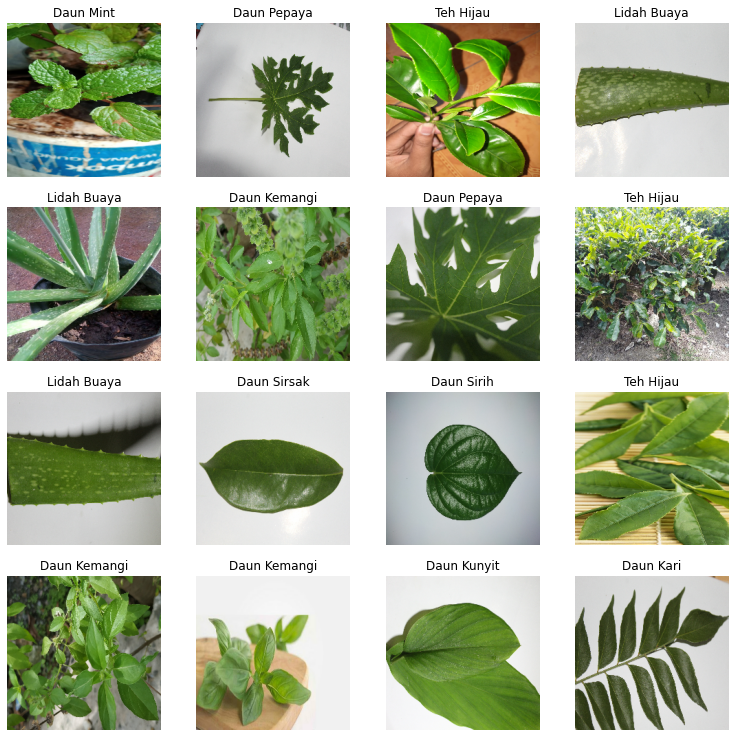

In [16]:
plt.figure(figsize=(13,13))
for images, labels in train_dataset.take(1):
  for i in range(16):
    ax = plt.subplot(4,4,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [17]:
base_model = InceptionV3(input_shape=(224,224,3), include_top=False, weights='imagenet')

87924736/87910968 [==============================] - 0s 0us/step


In [44]:
base_model.trainable = True

In [19]:
fine_tune = 50
for layer in base_model.layers[:fine_tune]:
  layer.trainable = False

In [20]:
model = tf.keras.Sequential([
                             base_model,
                             keras.layers.GlobalAveragePooling2D(),
                             keras.layers.Dense(10, activation='softmax')
])

In [21]:
model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(lr=0.0001),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 10)                20490     
                                                                 
Total params: 21,823,274
Trainable params: 20,490
Non-trainable params: 21,802,784
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [22]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

In [25]:
callbacks = myCallback()
history = model.fit(train_generator, 
                    epochs=30, 
                    validation_data=validation_generator, 
                    verbose=1,
                    callbacks=callbacks)

Epoch 1/30
13/13 [==============================] - 202s 16s/step - loss: 2.3530 - accuracy: 0.1562 - val_loss: 2.1506 - val_accuracy: 0.1950
Epoch 2/30
13/13 [==============================] - 191s 15s/step - loss: 2.0528 - accuracy: 0.2900 - val_loss: 1.9248 - val_accuracy: 0.3500
Epoch 3/30
13/13 [==============================] - 190s 15s/step - loss: 1.7986 - accuracy: 0.4175 - val_loss: 1.7422 - val_accuracy: 0.4700
Epoch 4/30
13/13 [==============================] - 190s 15s/step - loss: 1.6083 - accuracy: 0.5200 - val_loss: 1.5820 - val_accuracy: 0.5550
Epoch 5/30
13/13 [==============================] - 189s 15s/step - loss: 1.4027 - accuracy: 0.6375 - val_loss: 1.4455 - val_accuracy: 0.6250
Epoch 6/30
13/13 [==============================] - 189s 15s/step - loss: 1.2620 - accuracy: 0.7038 - val_loss: 1.3319 - val_accuracy: 0.6550
Epoch 7/30
13/13 [==============================] - 189s 15s/step - loss: 1.1209 - accuracy: 0.7462 - val_loss: 1.2332 - val_accuracy: 0.7000
Epoch 

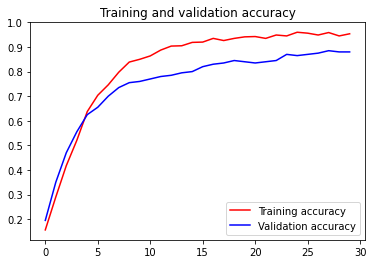

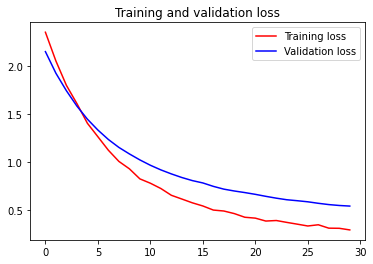

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Saving photo6098348824809550329.jpg to photo6098348824809550329.jpg


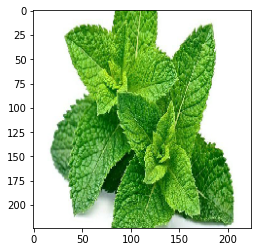

Daun Jambu Biji: 0.20%
Daun Kari: 0.52%
Daun Kemangi: 2.87%
Daun Kunyit: 0.98%
Daun Mint: 80.98%
Daun Pepaya: 1.61%
Daun Sirih: 7.61%
Daun Sirsak: 0.15%
Lidah Buaya: 2.99%
Teh Hijau: 2.08%


In [40]:
# upload images to predict their accuracy
labels = train_generator.class_indices.keys()
uploaded = files.upload()

for paths in uploaded.keys():
 
  # predicting images
  path = paths
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  images = np.vstack([x])
  proba = model.predict(images)[0]
  plt.imshow(img)
  plt.show()
  for (label, p) in zip(labels, proba):
    print("{}: {:.2f}%".format(label, p * 100))

In [41]:
export_dir = "/content/"
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: /content/assets


INFO:tensorflow:Assets written to: /content/assets


In [42]:
# convert the model to tflite
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [43]:
# download the tflite file to local
tflite_model_file = pathlib.Path("/content/paranmo_transferlearning_model.tflite")
tflite_model_file.write_bytes(tflite_model)

87215072